<h1><center>Лабораторная работа 3 </h1><center>

Для этой работы был выбран другой датасет - https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data. 
Этот набор данных содержит информацию о различных атрибутах набора фруктов, предоставляя понимание их характеристик. 
Набор данных включает такие данные, как идентификатор фрукта, размер, вес, сладость, хрусткость, сочность, спелость, кислотность и качество.

Описание столбцов:
1. A_id	- Уникальный идентификатор для каждого фрукта
2. Size - Размер плода
3. Weight - Масса плода
4. Sweetness - Сладость фруктов
5. Crunchiness - Текстура, указывающая на хрусткость плода
6. Juiciness - Уровень сочности плодов
7. Ripeness - Стадия зрелости плода
8. Acidity - Уровень кислотности плодов
9. Quality- Общее качество плодов

In [1712]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay, roc_curve

In [1714]:
df = pd.read_csv('Lab3.csv')
print("Вывод части таблицы:")
df

Вывод части таблицы:


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


## Обработка дата сета

In [1717]:
# Удаляем дублированные строки
df = df.drop_duplicates()
# удаление строк с NaN
columns = ['A_id','Size', 'Weight','Sweetness','Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Quality']
for i in columns:
    df = df[df[i].notna()]

In [1719]:
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})

# Преобразование Quality в целочисленный тип
df['Quality'] = df['Quality'].astype(int)
# Проверка результата
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


In [1721]:
 # Преобразование данных в числовые значения
columns_to_convert = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [1723]:
def Remove(df, columns):
    result = df.copy()  
    initial_shape = df.shape[0]

    result = result.dropna(subset=columns)
    final_shape = result.shape[0]
    
    if final_shape == initial_shape:
        print("Пропущенных значений нет")
    else:
        removed_rows = initial_shape - final_shape 
        print(f"Есть пропущенные значения. Удалено строк: {removed_rows}")

    total_removed_outliers = 0

    for column in columns:
        Q1 = result[column].quantile(0.25)
        Q3 = result[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = result[(result[column] < lower_bound) | (result[column] > upper_bound)]
        num_outliers = outliers.shape[0]
        
        if num_outliers > 0:
            total_removed_outliers += num_outliers
            print(f'Обнаружены выбросы в столбце "{column}":')
            print(outliers[column])
            print()
        
        result = result.drop(outliers.index)

    if total_removed_outliers > 0:
        print(f'Количество выбросов, обнаруженных по методу IQR: {total_removed_outliers}')
    else:
        print('Выбросов не обнаружено.')

    return result

In [1725]:
# поиск пропущенных значений и выбросов
C = ['Size', 'Weight','Sweetness','Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
df = Remove(df,C)

Пропущенных значений нет
Обнаружены выбросы в столбце "Size":
251     5.189624
276    -6.129668
634     5.866232
1110   -5.975032
1381    6.406367
1516   -6.690121
2001   -6.905803
2002    5.403276
2035   -5.879771
2120    4.834608
2331   -6.669725
2458   -6.713315
2514    4.799683
2532    4.842414
2642    5.074031
2676   -6.710169
2875    5.225383
2916   -6.087715
3484    5.104364
3559   -7.151703
3859   -6.099551
3973    5.865861
Name: Size, dtype: float64

Обнаружены выбросы в столбце "Weight":
83     -6.235107
247     5.149000
257     3.603286
351    -5.103104
412    -5.227087
484     3.285301
526    -6.556685
561    -5.908736
573    -5.478682
672     4.363066
889    -5.592343
895     3.821094
1023   -5.413733
1117    3.598690
1386   -6.000748
1403    3.440811
1446    4.151368
1523   -6.581590
1546    3.183011
1629   -5.570705
1772   -5.746384
1919   -5.343076
2045    4.369571
2055    3.332821
2106    4.093888
2151    3.164263
2196    3.207896
2319    3.511758
2320    3.219762
2327

Графики зависимости одной переменной от другой (plt.scatter)

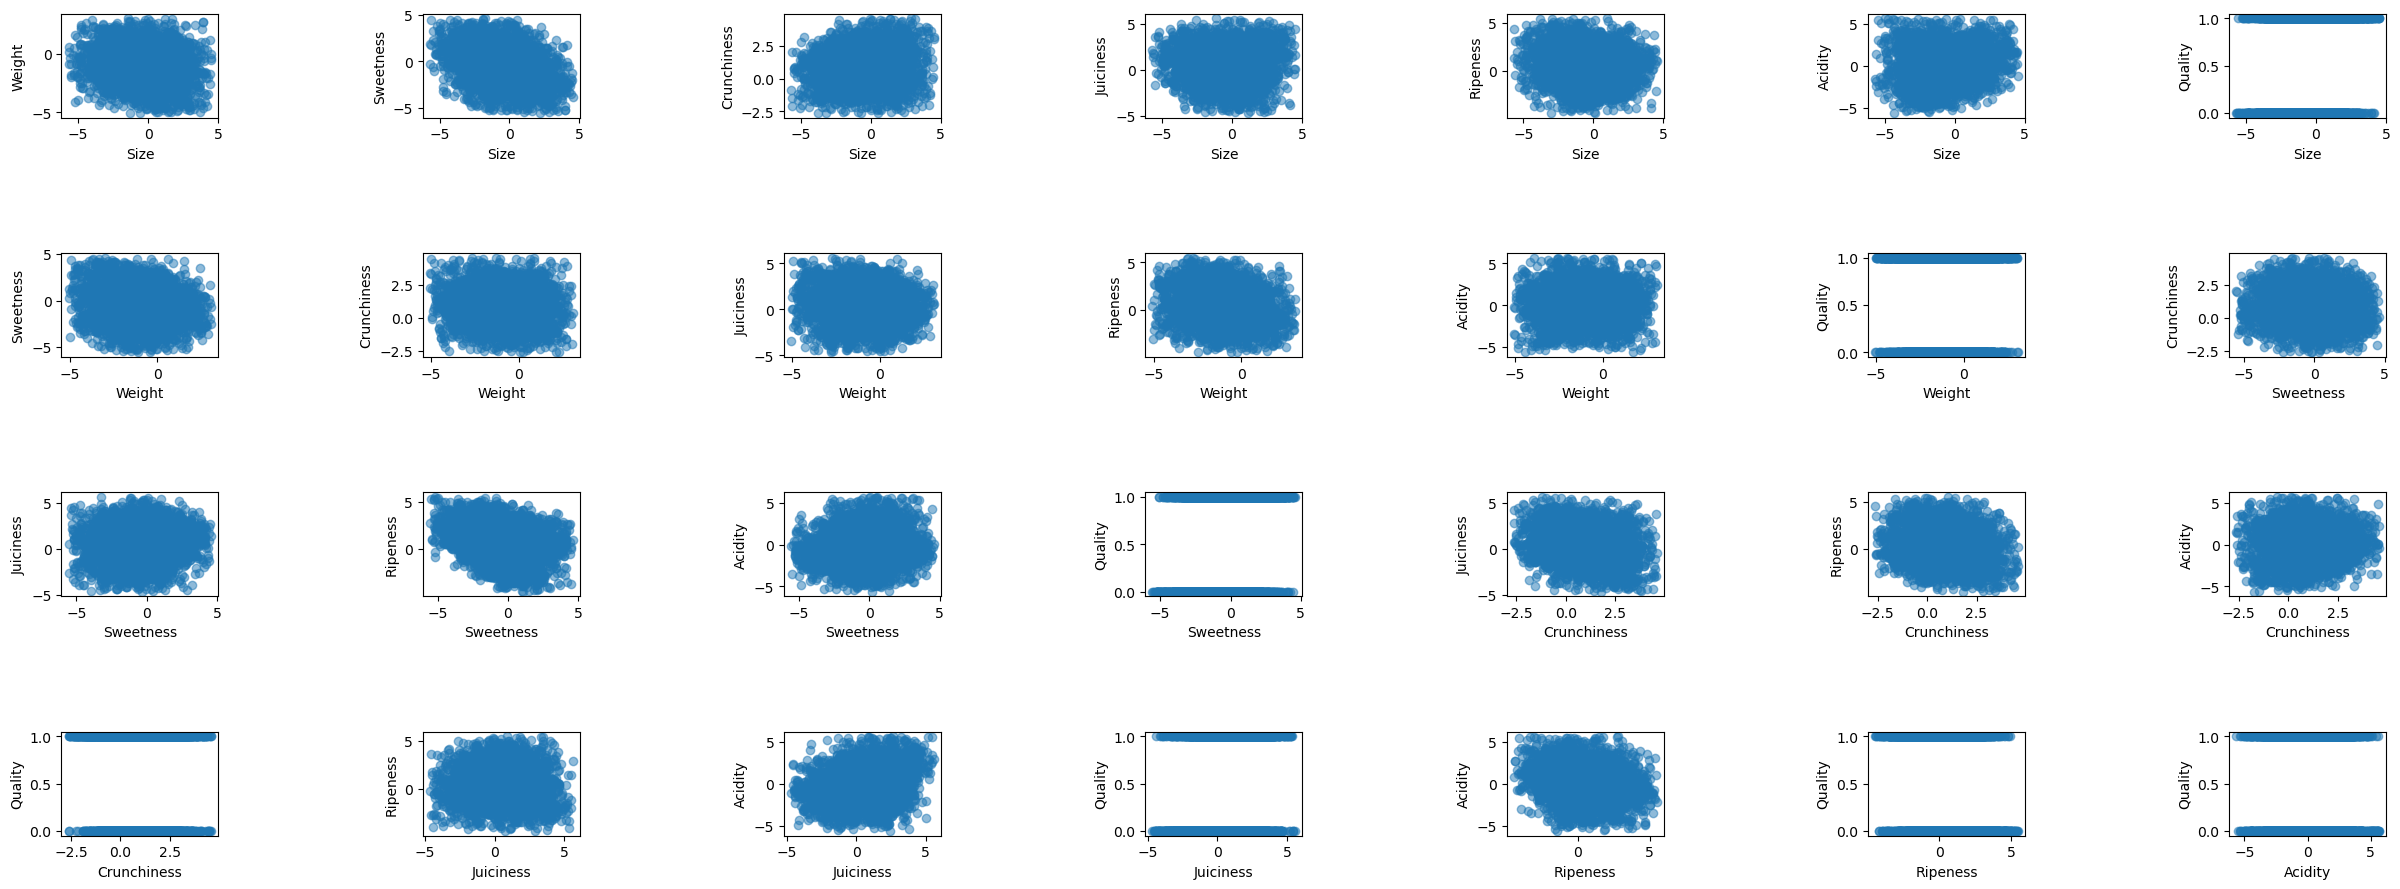

In [1728]:
plt.figure(1, figsize=(30, 20))  # Увеличен размер для удобства
n = 0
variables = ['Size', 'Weight','Sweetness','Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Quality']
num_variables = len(variables)

for i in range(num_variables):
    for j in range(i + 1, num_variables):  
        n += 1
        plt.subplot(num_variables - 1, num_variables - 1, n)  
        x = variables[i]
        y = variables[j]
        plt.scatter(df[x], df[y], alpha=0.5)
        # plt.title(f'{x} vs {y}')  
        plt.xlabel(x)
        plt.ylabel(y)
        z = np.polyfit(df[x], df[y], 1)
        p = np.poly1d(z)
        #plt.plot(df[x], p(df[x]), color='red')

plt.subplots_adjust(hspace= 1.3, wspace=1.3)  # Настройка расстояния между подграфиками
plt.show()

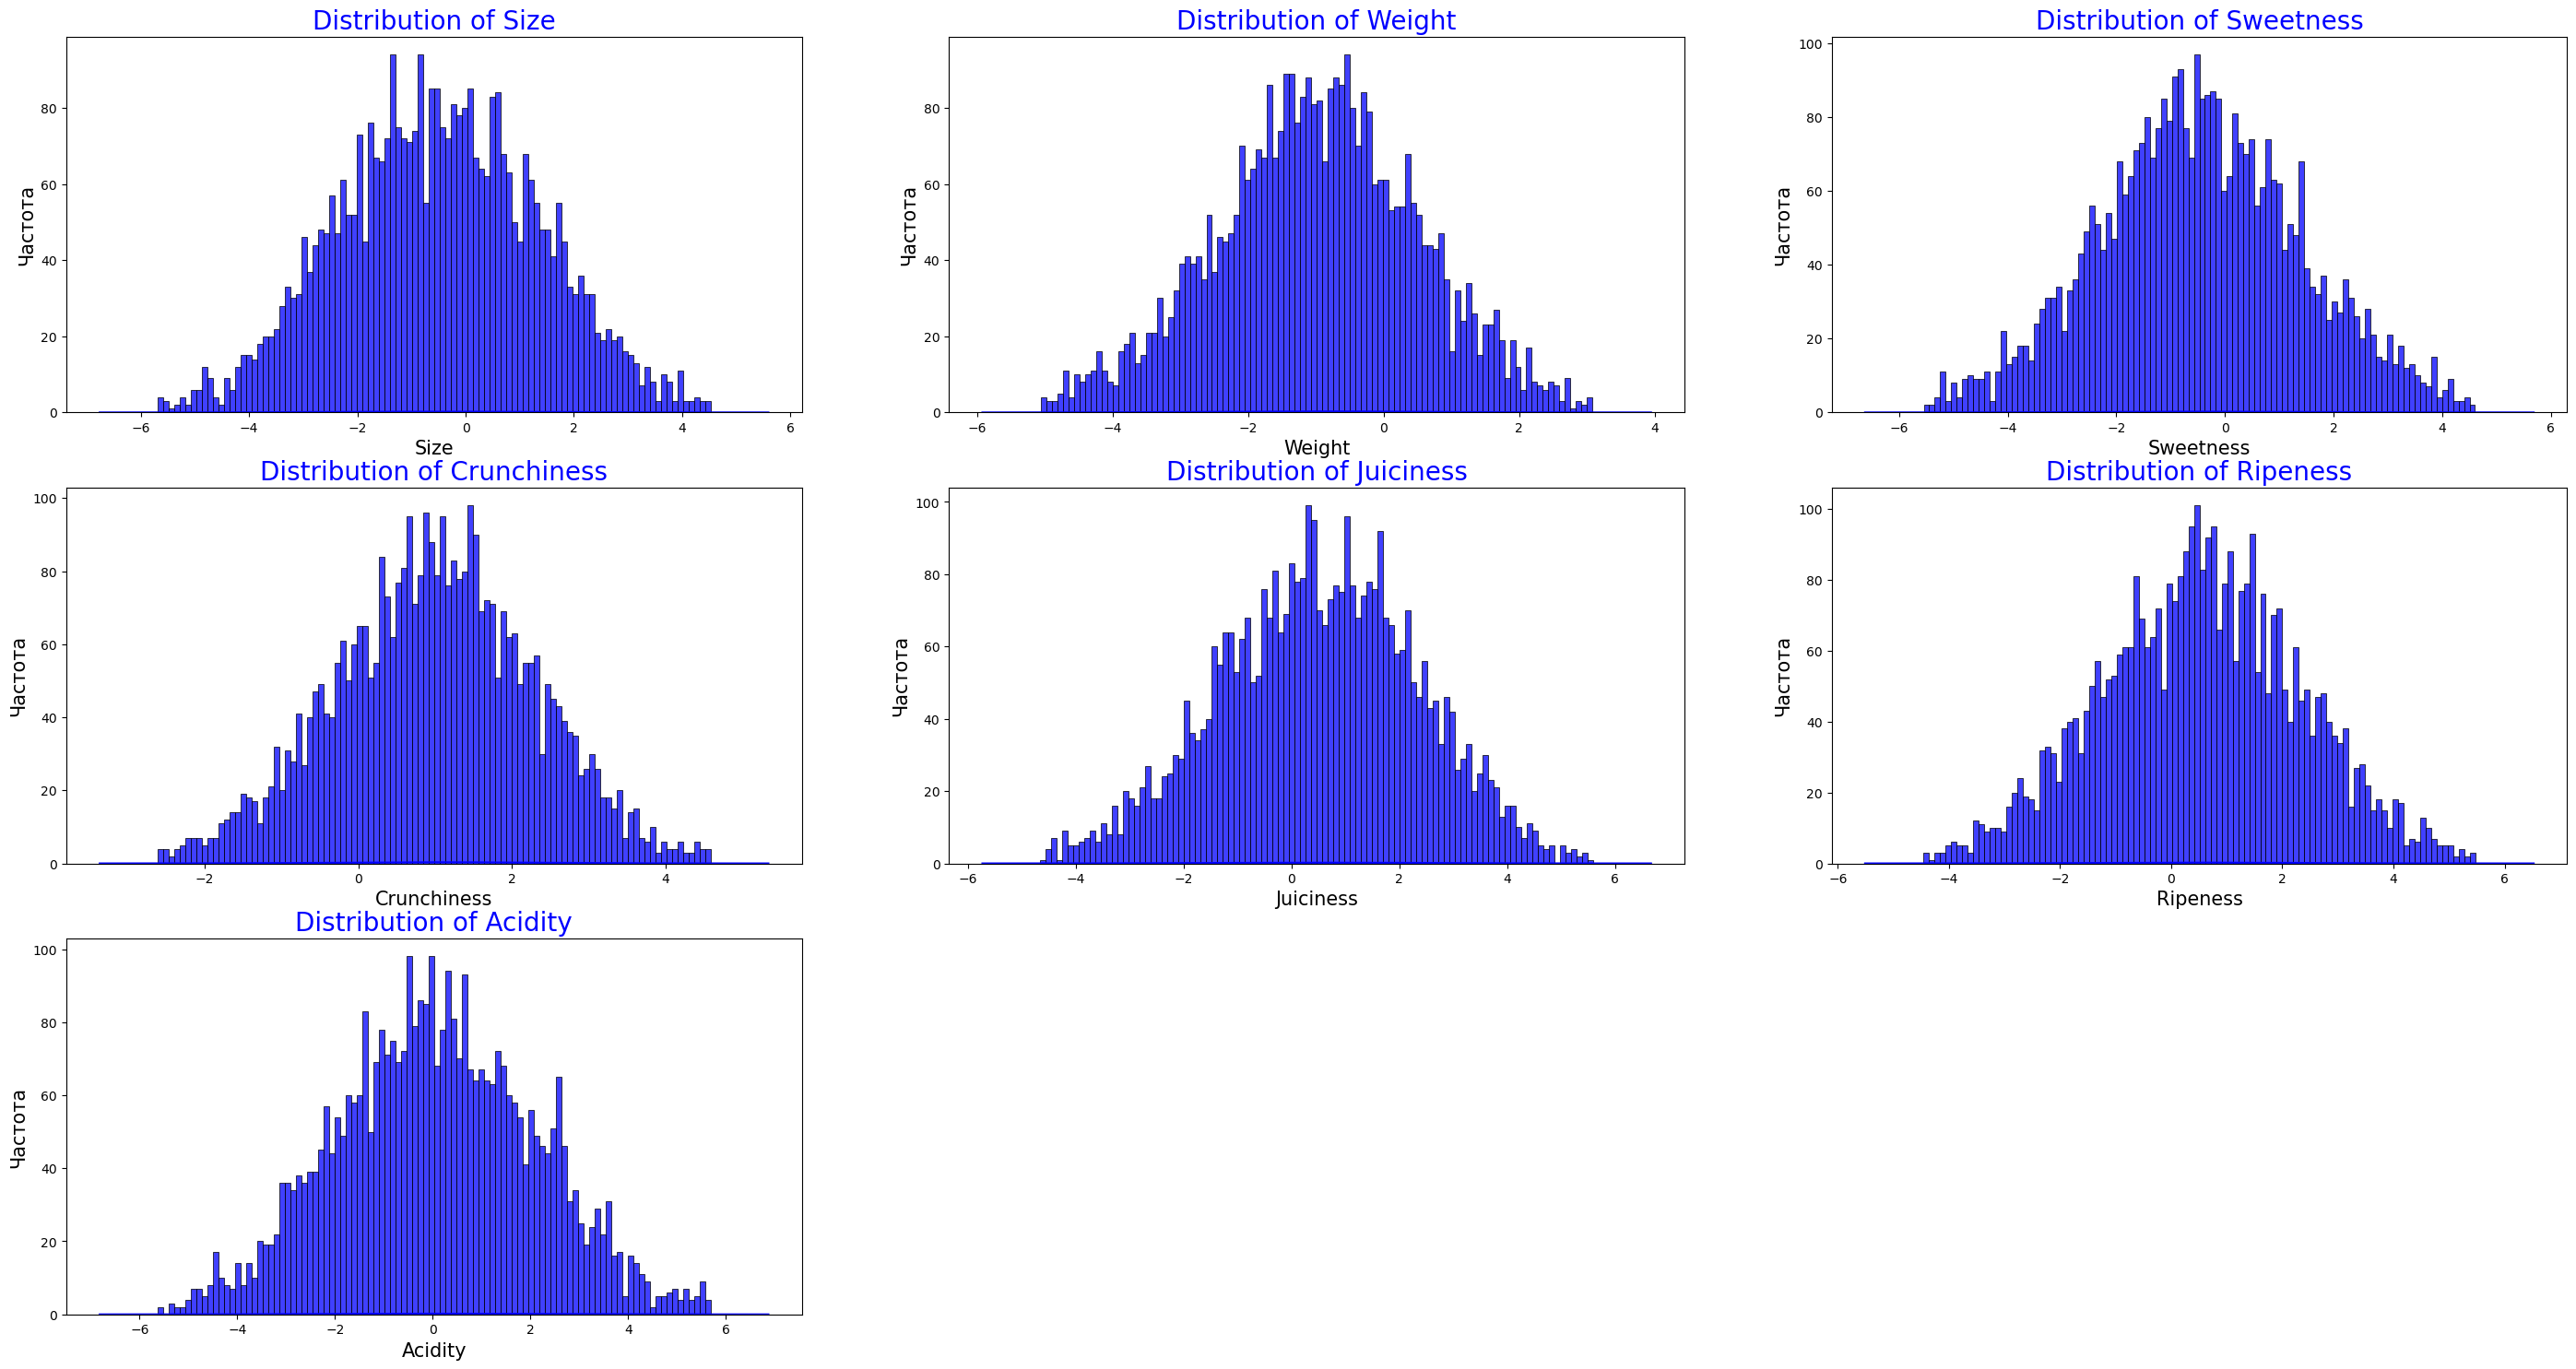

In [1729]:
def histogram(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    # Исключаем график для столбца 'A_id'
    numerical_columns = numerical_columns[numerical_columns != 'A_id']
    
    lens = len(numerical_columns)
    num_rows = (lens + 2) // 3  
    num_cols = 3  
    fig, X = plt.subplots(num_rows, num_cols, figsize=(35, 6 * num_rows))  
    X = X.flatten()
    
    for i, col in enumerate(numerical_columns):
        sns.histplot(data=df, x=col, bins=100, color='blue', edgecolor='black', kde=False, ax=X[i]) 
        sns.kdeplot(data=df, x=col, color='blue', ax=X[i])

        X[i].set_title(f"Distribution of {col}", fontsize=20, color="blue")  
        X[i].set_xlabel(col, fontsize=15)  
        X[i].set_ylabel("Частота", fontsize=15)  
    
    for j in range(lens, num_rows * num_cols):
        X[j].axis('off') 
    
    plt.show()

histogram(df)

## Выполнение алгоритмов классификации

Целевой класс (метка) — это дискретный атрибут, значение которого нужно предсказать на основе значений других атрибутов. 
Атрибут,  выступающий в роли целевого класса (метки) - Общее качество плодов(Quality)

Оценка сбалансированности классов

In [1733]:
target_column = 'Quality'
features = df.drop(columns=[target_column])
target = df[target_column]
class_counts = target.value_counts()
print("Распределение классов:")
print(class_counts)

Распределение классов:
Quality
0    1925
1    1861
Name: count, dtype: int64


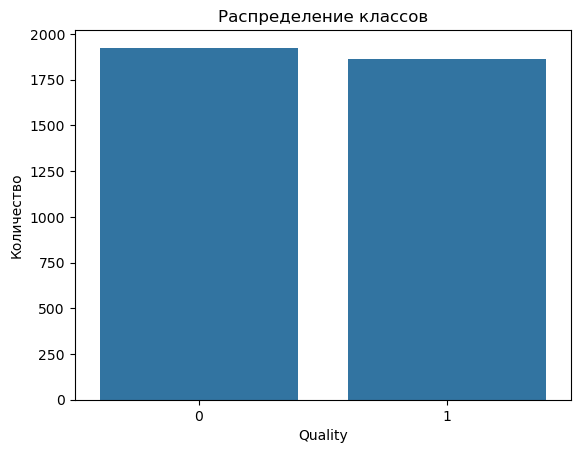

In [1734]:
sns.countplot(x=target)
plt.title('Распределение классов')
plt.xlabel('Quality')
plt.ylabel('Количество')
plt.show()

В описании к дата сету написано: Данные были масштабированы и очищены для удобства использования

In [1736]:
X = data.drop(columns=['Quality'])
y = data['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Text(0, 0.5, 'Mean Error')

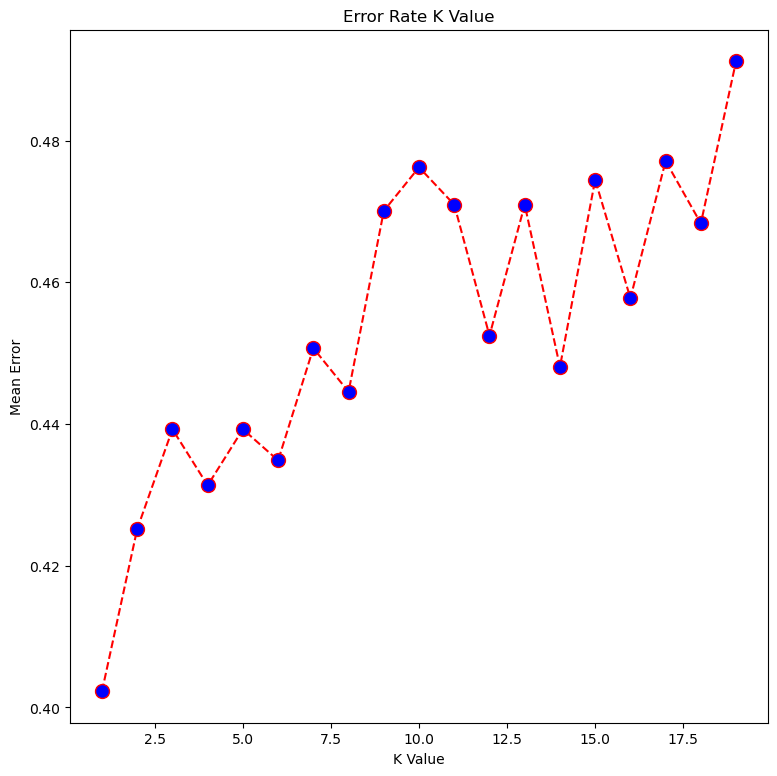

In [1737]:
error = [] 
for i in range(1, 20): 
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train) 
    pred_i = knn.predict(X_test) 
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(9, 9))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10) 
plt.title('Error Rate K Value') 
plt.xlabel('K Value') 
plt.ylabel('Mean Error')

In [1738]:
# Поиск оптимального значения k для kNN
param_grid_knn = {'n_neighbors': np.arange(1, 21)}
knn = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn, param_grid_knn, cv=5)
knn_gscv.fit(X_train, y_train)

best_k = knn_gscv.best_params_['n_neighbors']
print(f"Оптимальное значение k для kNN: {best_k}")

# Обучение модели с оптимальным k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred_knn = knn_best.predict(X_test)

Оптимальное значение k для kNN: 1


In [1739]:
# Поиск оптимальных параметров для дерева решений
param_grid_tree = {'max_depth': np.arange(1, 30)}
tree = DecisionTreeClassifier()
tree_gscv = GridSearchCV(tree, param_grid_tree, cv=5)
tree_gscv.fit(X_train, y_train)
best_depth = tree_gscv.best_params_['max_depth']
print(f"Оптимальная глубина дерева решений: {best_depth}")

Оптимальная глубина дерева решений: 10


In [1740]:
tree_best = DecisionTreeClassifier(max_depth=best_depth)
tree_best.fit(X_train, y_train)
y_pred_tree = tree_best.predict(X_test)

In [1741]:
Tree = tree_grid.predict_proba(X_test)
Tree

array([[0.87412587, 0.12587413],
       [0.81481481, 0.18518519],
       [0.83505155, 0.16494845],
       ...,
       [0.28034682, 0.71965318],
       [0.11940299, 0.88059701],
       [0.95818815, 0.04181185]])

In [1742]:
Knn = knn_grid.predict_proba(X_test)
Knn

array([[0.11111111, 0.88888889],
       [1.        , 0.        ],
       [0.        , 1.        ],
       ...,
       [0.66666667, 0.33333333],
       [0.11111111, 0.88888889],
       [0.88888889, 0.11111111]])

## Сравнение полученных результатов с помощью различных метрик оценки качества

dict_keys(['kNN', 'Decision Tree'])
dict_values([0.5977112676056338, 0.7746478873239436])


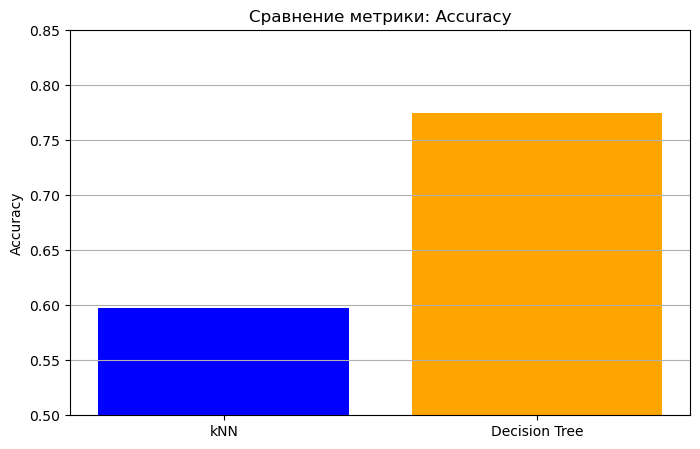

dict_keys(['kNN', 'Decision Tree'])
dict_values([0.5974656341488682, 0.7746478873239436])


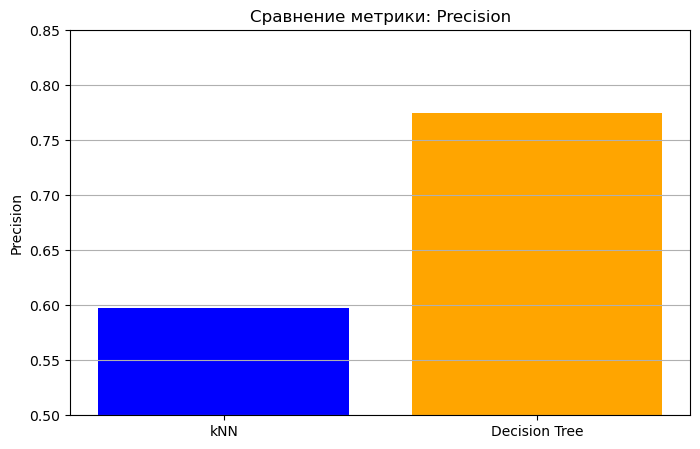

dict_keys(['kNN', 'Decision Tree'])
dict_values([0.5977112676056338, 0.7746478873239436])


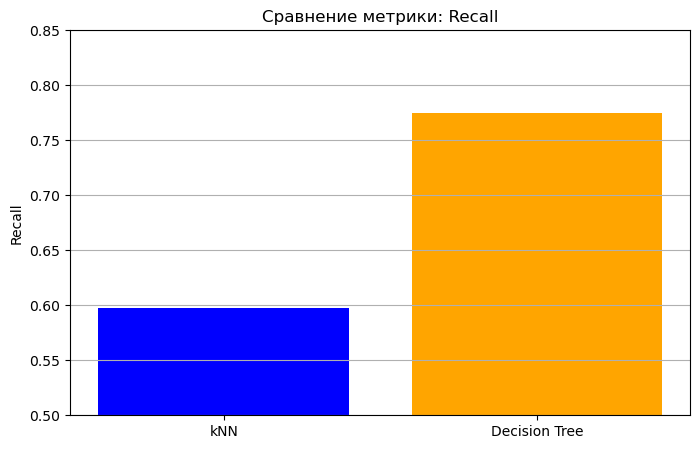

dict_keys(['kNN', 'Decision Tree'])
dict_values([0.5975509455231444, 0.7746478873239436])


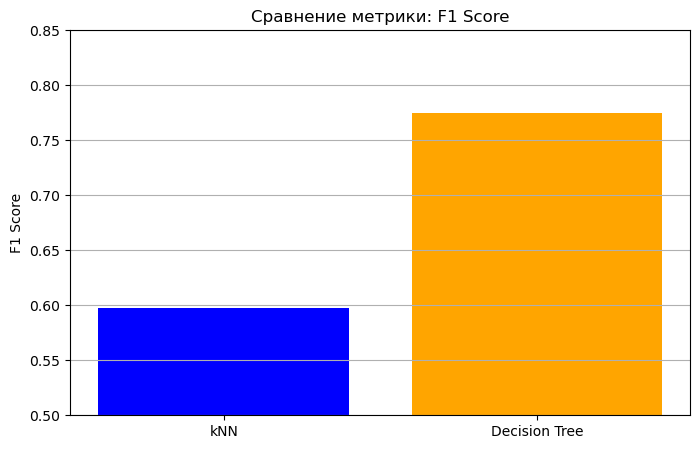

In [1744]:
# Метрики для каждой модели
metrics = {
    'Accuracy': {
        'kNN': accuracy_score(y_test, y_pred_knn),
        'Decision Tree': accuracy_score(y_test, y_pred_tree)
    },
    'Precision': {
        'kNN': precision_score(y_test, y_pred_knn, average='weighted'),
        'Decision Tree': precision_score(y_test, y_pred_tree, average='weighted')
    },
    'Recall': {
        'kNN': recall_score(y_test, y_pred_knn, average='weighted'),
        'Decision Tree': recall_score(y_test, y_pred_tree, average='weighted')
    },
    'F1 Score': {
        'kNN': f1_score(y_test, y_pred_knn, average='weighted'),
        'Decision Tree': f1_score(y_test, y_pred_tree, average='weighted')
    }
}

# Функция для построения графиков метрик
def plot_metric(metric_name, values):
    plt.figure(figsize=(8, 5))
    plt.bar(values.keys(), values.values(), color=['blue', 'orange'])
    plt.title(f'Сравнение метрики: {metric_name}')
    plt.ylabel(metric_name)
    plt.ylim(0.5, 0.85)  
    plt.grid(axis='y')
    print(values.keys())
    print(values.values())
    plt.show()

# Построение графиков для каждой метрики
for metric_name, values in metrics.items():
    plot_metric(metric_name, values)

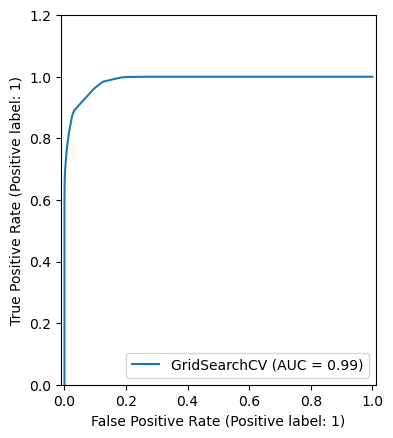

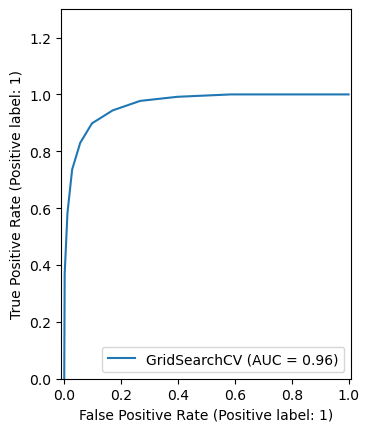

In [1746]:
RocCurveDisplay.from_estimator(tree_gscv, X_train, y_train)
plt.ylim([0, 1.2])
RocCurveDisplay.from_estimator(knn_grid, X_train, y_train)
plt.ylim([0, 1.3]);

Для данной задачи дерево решений работает лучше

В результате выполнения работы были получены следующие результаты:

1. Для метрики Accuracy, которая отражает долю правильных предсказаний модели на тестовой выборке, значения составили 0,5977112676056338 для kNN и 0,7878521126760564 для дерева решений. Это означает, что модель дерева решений показала более высокую точность предсказаний по сравнению с моделью kNN.

2. Для метрики Precision, которая показывает, насколько часто модель правильно предсказывает положительный результат, значения составили 0,5974656341488682 для kNN и 0,7878416214752363 для дерева решений. Здесь также модель дерева решений продемонстрировала лучшие результаты.

3. Метрика Recall, отражающая способность модели находить все положительные примеры в данных, дала значения 0,5977112676056338 для kNN и 0,7878521126760564 для дерева решений, что подтверждает преимущество модели дерева решений перед kNN.

4. F1 Score, который представляет собой гармоническое среднее между Precision и Recall, показал значения 0,5975509455231444 для kNN и 0,7876698622673222 для дерева решений. И снова модель дерева решений оказалась более эффективной.

Таким образом, можно сделать вывод, что алгоритм дерева решений показал лучшие результаты по всем рассмотренным метрикам оценки качества классификации.

## Вывод

Для данной работы был выбран новый дата сет, так как для предыдущего было сложно выбрать целевой класс.
Из него были удалены выбросы, построены графики и диагарммы.
Также были применены алгоритмы классификации: kNN и дерево решений
Полученный результаты были сравнены с помощью различных метрик оценки качества